In [ ]:
!pip install dash==2.14.2 jupyter-dash==0.4.2 pyngrok


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
from dash import Input, Output, dcc, html
from jupyter_dash import JupyterDash
from pyngrok import ngrok
JupyterDash.infer_jupyter_proxy_config()

In [ ]:
df = pd.read_csv("/content/scfp2019excel.zip")
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (28885, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [ ]:
mask = df["TURNFEAR"]==1
df_fear = df[mask]
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [ ]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [ ]:
age = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(age)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head(10)

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


,AGECL
5,45-54
6,45-54
7,45-54
8,45-54
9,45-54
110,65-74
111,65-74
112,65-74
113,65-74
114,65-74


<Axes: xlabel='AGECL'>

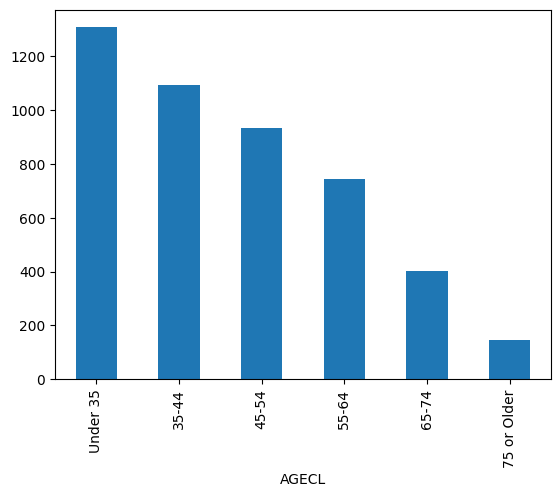

In [ ]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind="bar")

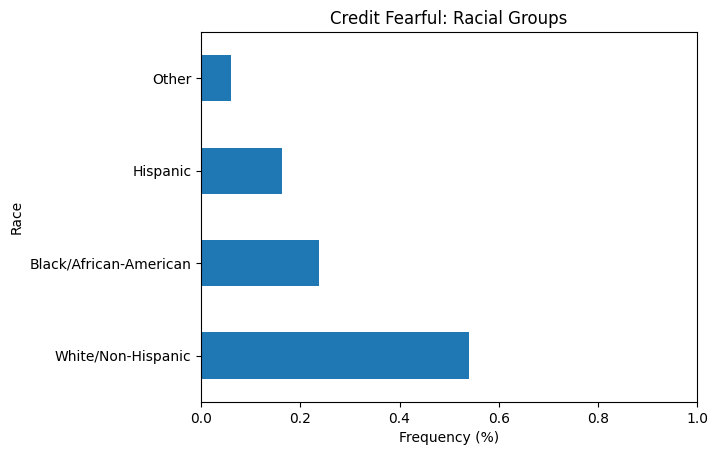

In [ ]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)

race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

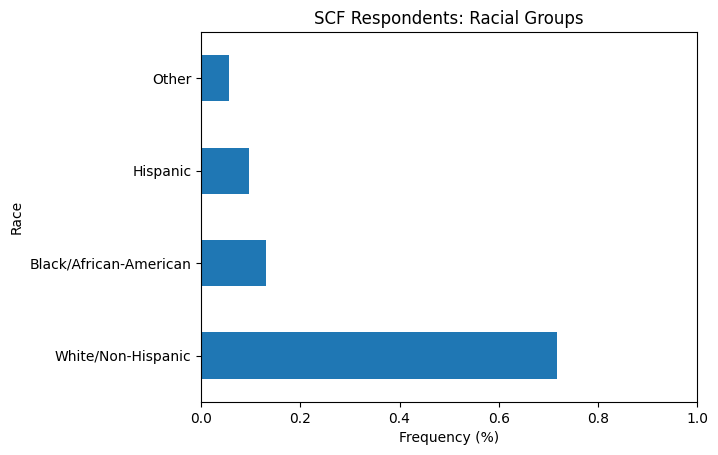

In [ ]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [ ]:
incatt = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(incatt)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")

)
df_inccat=pd.DataFrame(df_inccat)
print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 1)


frequency
TURNFEAR INCCAT            
0        90-100    0.297296
         60-79.9   0.174841
         40-59.9   0.143146
         0-20      0.140343
         21-39.9   0.135933
         80-89.9   0.108441
1        0-20      0.288125
         21-39.9   0.256327
         40-59.9   0.228856
         60-79.9   0.132598
         90-100    0.048886
         80-89.9   0.045209

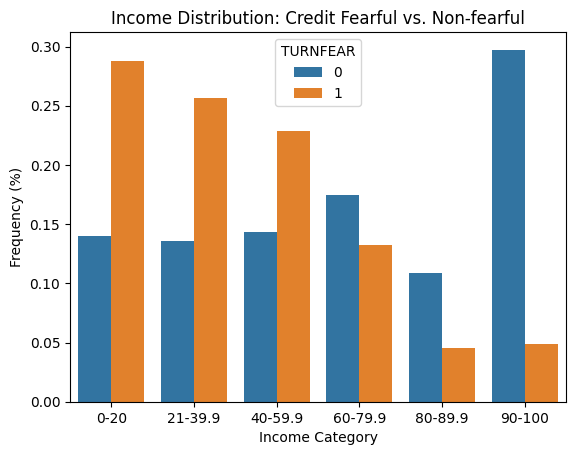

In [ ]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=incatt.values()

)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

In [ ]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198061919267267


In [ ]:
asset_house_corr = asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735998714


In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519806,0.622440,0.261261,0.116665
HOUSES,0.519806,1.000000,0.247852,0.266661,0.169300
INCOME,0.622440,0.247852,1.000000,0.114646,0.069400
DEBT,0.261261,0.266661,0.114646,1.000000,0.054179
EDUC,0.116665,0.169300,0.069400,0.054179,1.000000


In [ ]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


In [ ]:
mask=(df["TURNFEAR"]==1) & (df["NETWORTH"]<2e6)
df=df[mask]
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [ ]:
# Calculate trimmed variance
top_ten_trim_var = df.apply(trimmed_var).sort_values().tail(10)

print("top_ten_trim_var type:", type(top_ten_trim_var))
print("top_ten_trim_var shape:", top_ten_trim_var.shape)
top_ten_trim_var

top_ten_trim_var type: <class 'pandas.core.series.Series'>
top_ten_trim_var shape: (10,)


,0
WAGEINC,7.415894e+08
HOMEEQ,9.548834e+08
NH_MORT,1.755886e+09
MRTHEL,1.819848e+09
PLOAN1,1.902850e+09
NETWORTH,4.011771e+09
DEBT,4.099576e+09
HOUSES,6.508833e+09
NFIN,1.108097e+10
ASSET,1.530852e+10


In [ ]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
    x=top_ten_trim_var,
    y=top_ten_trim_var.index,
    title="SCF: High Variance Features"
)

fig.show()

In [ ]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()

print("high_var_cols type:", type(high_var_cols))
print("high_var_cols len:", len(top_ten_trim_var))
high_var_cols

high_var_cols type: <class 'list'>
high_var_cols len: 10


['NETWORTH', 'DEBT', 'HOUSES', 'NFIN', 'ASSET']

In [ ]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4407, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
5,-7778.267550,14142.304636,0.0,4520.900662,6364.037086
6,-5459.856954,14605.986755,0.0,7302.993377,9146.129801
7,-9406.950993,17735.841060,0.0,6491.549669,8328.890066
8,-2909.605298,16344.794702,0.0,11592.052980,13435.189404
9,-6624.858278,17851.761589,0.0,9389.562914,11226.903311


In [ ]:
X_summary = X.aggregate(["mean","std"]).astype(int)

print("X_summary type:", type(X_summary))
print("X_summary shape:", X_summary.shape)
X_summary

X_summary type: <class 'pandas.core.frame.DataFrame'>
X_summary shape: (2, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
mean,83364,83742,84402,133516,167107
std,233386,156766,173952,271491,314071


In [ ]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data,columns=X.columns)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (4407, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
0,-0.390568,-0.444027,-0.485262,-0.475192,-0.511863
1,-0.380633,-0.441069,-0.485262,-0.464943,-0.503004
2,-0.397547,-0.421102,-0.485262,-0.467932,-0.505606
3,-0.369704,-0.429976,-0.485262,-0.449143,-0.489346
4,-0.385625,-0.420362,-0.485262,-0.457257,-0.496378


In [ ]:
X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary

X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
mean,0,0,0,0,0
std,1,1,1,1,1


In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X,model.named_steps["kmeans"].labels_))
print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [10900.236324338819, 7282.216921075292, 5921.609136781836, 5022.328416314565, 4662.2430468346965, 4182.647527136193, 3590.5482440660917, 2900.6567533393913, 2700.7086892578286, 2460.9374330421115, 2313.0339565703302]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [np.float64(0.7456405015578531), np.float64(0.705657078429262), np.float64(0.6916084376396612), np.float64(0.654690819195765), np.float64(0.6550283856406045), np.float64(0.6585092828062615), np.float64(0.6430573232697845), np.float64(0.6505760739873413), np.float64(0.6341463706956901), np.float64(0.6318835409839166), np.float64(0.6356507608439945)]


In [ ]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=inertia_errors,
    title="K-Means Model: Inertia vs Number of Clusters"
)

fig.show()

In [ ]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
     x=n_clusters,
     y=silhouette_scores,
     title="K-Means Model: Silhouette Score vs Number of Clusters"
)

fig.show()

In [ ]:
# Build model
final_model = make_pipeline(StandardScaler(),KMeans(n_clusters=4,random_state=42))

# Fit model to data
final_model.fit(X)

# Assert that model has been fit to data
check_is_fitted(final_model)

In [ ]:
labels = final_model.named_steps["kmeans"].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 4407
[1 1 1 1 1]


In [ ]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
0,176209.020791,245771.376235,278812.561635,3.564071e+05,4.219804e+05
1,13678.245843,29224.778724,13678.554647,2.906774e+04,4.290302e+04
2,916820.225307,161457.071063,340790.586114,8.107834e+05,1.078277e+06
3,785541.551276,869667.740220,931639.995653,1.489541e+06,1.655209e+06


In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode="group"
)

fig.show()

In [ ]:

pca = PCA(n_components=2,random_state=42)


X_t = pca.fit_transform(X)


X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (4407, 2)


,PC1,PC2
0,-249467.153516,20504.439053
1,-245134.044844,21621.580659
2,-247019.246103,17108.088264
3,-238646.799054,22031.877446
4,-242436.415674,18742.103863


In [ ]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
     data_frame=X_pca,
     x="PC1",
     y="PC2",
     color=labels.astype(str),
     title="PCA Representation of Clusters"
)


fig.show()

In [ ]:
app = JupyterDash(__name__)

print("app type:", type(app))

app type: <class 'jupyter_dash.jupyter_app.JupyterDash'>


/usr/local/lib/python3.11/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
app.layout = html.Div(
    [
        html.H1("Survey of Consumer Finances"),
        html.H2("High Variance Features"),
        dcc.Graph(id="bar-chart"),
        dcc.RadioItems(
            options=[
                {"label":"Trimmed" ,"value": True},
                {"label":"Not trimmed", "value": False}
            ],
            value=True,
            id="trimmed-button"

        ),
        html.H2("K-means Clustering"),
        html.H3("Number of Clusters (k)"),
        dcc.Slider(min=2,max=12,step=1,value=2,id="k_slider"),
        html.Div(id="metrics"),
        dcc.Graph(id="pca-scatter")
    ]

)

In [ ]:
def get_high_var_features(trimmed=True,return_feat_names=False):


    if trimmed:
        top_five_features=df.apply(trimmed_var).sort_values().tail(5)
    else:
        top_five_features=df.var().sort_values().tail(5)

    if return_feat_names:
        top_five_features=top_five_features.index.to_list()

    return top_five_features

In [ ]:
get_high_var_features(trimmed=False,return_feat_names=True)

['BUS', 'NFIN', 'NHNFIN', 'NETWORTH', 'ASSET']

In [ ]:
@app.callback(
    Output("bar-chart","figure"),Input("trimmed-button","value")
)
def serve_bar_chart(trimmed=True):


    values= get_high_var_features(trimmed=trimmed,return_feat_names=False)
    fig=px.bar(x=values,y=values.index,orientation="h")
    fig.update_layout(xaxis_title="Variance",yaxis_title="Features")
    return fig

In [ ]:
serve_bar_chart(trimmed=False)

In [ ]:
def get_model_metrics(trimmed=True,k=2,return_metrics=False):


    features=get_high_var_features(trimmed=trimmed,return_feat_names=True)
    X=df[features]
    model=make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    model.fit(X)

    if return_metrics:
        i=model.named_steps["kmeans"].inertia_
        s=silhouette_score(X,model.named_steps["kmeans"].labels_)
        m={
            "Inertia":round(i),
            "Silhouette Score": round(s,3)

        }
        return m
    return model

In [ ]:
@app.callback(
    Output("metrics","children"),
    Input("trimmed-button","value"),
    Input("k_slider","value")
)
def serve_metrics(trimmed=True,k=2):


    m=get_model_metrics(trimmed=trimmed,k=k,return_metrics=True)
    text=[
        html.H3(f"Inertia : {m['Inertia']}"),
        html.H3(f"Silhouette Score : {m['Silhouette Score']}"),
    ]
    return text

In [ ]:
serve_metrics()

[H3('Inertia : 57069'), H3('Silhouette Score : 0.977')]

In [ ]:
def get_pca_labels(trimmed=True,k=2):

    """
    ``KMeans`` labels.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    features=get_high_var_features(trimmed=trimmed,return_feat_names=True)
    X=df[features]
    transformer=PCA(n_components=2,random_state=42)
    X_t=transformer.fit_transform(X)
    X_pca=pd.DataFrame(X_t,columns=["PC1","PC2"])
    model=get_model_metrics(trimmed=trimmed,k=k,return_metrics=False)
    X_pca["labels"]=model.named_steps["kmeans"].labels_.astype(str)
    X_pca.sort_values("labels",inplace=True)
    return X_pca

In [ ]:
@app.callback(
    Output("pca-scatter","figure"),
    Input("trimmed-button","value"),
    Input("k_slider","value")
)
def serve_scatter_plot(trimmed=True,k=2):

    """Build 2D scatter plot of ``df`` with ``KMeans`` labels.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    fig = px.scatter(
     data_frame=get_pca_labels(trimmed=trimmed,k=k),
     x="PC1",
     y="PC2",
     color="labels",
     title="PCA Representation of Clusters"
    )
    fig.update_layout(xaxis_title="PC1",yaxis_title="PC2")
    return fig

In [ ]:
app.run_server(mode='external')

<IPython.core.display.Javascript object>

Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>